## Librabries imports

In [35]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data load

In [36]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Initial Data Exploration

In [37]:
print("Shape:", df.shape)
print("\nColumn Names and Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())
print("\nUnique values for categorical columns:")
for col in ['sex', 'smoker', 'region']:
    print(f"{col}: {df[col].unique()}")

Shape: (1338, 7)

Column Names and Types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Summary Statistics:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Unique values for categorical columns:
sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


## Data Cleaning

In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [39]:
# Check for undefined or unusual values (example: sex/region/bmi/age with undefined)
print(df[df['sex'].isin(['undefined'])])
print(df[df['bmi'].isin(['undefined'])])
print(df[df['age'].isnull() | (df['age'] == '')])

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [40]:
# Remove rows with undefined/missing values
df_clean = df.replace('undefined', np.nan)
df_clean = df_clean.dropna()

In [42]:
# Convert data types if necessary
df_clean['age'] = df_clean['age'].astype(int)
df_clean['bmi'] = df_clean['bmi'].astype(float)
df_clean['children'] = df_clean['children'].astype(int)

df_encoded = pd.get_dummies(df_clean, columns=['sex'], drop_first=True)

In [ ]:
# Drop duplicates
df_clean = df_clean.drop_duplicates()

In [ ]:
# Confirm cleaning
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None


## Exploratory Data Analysis (EDA)

### Univariate Analysis

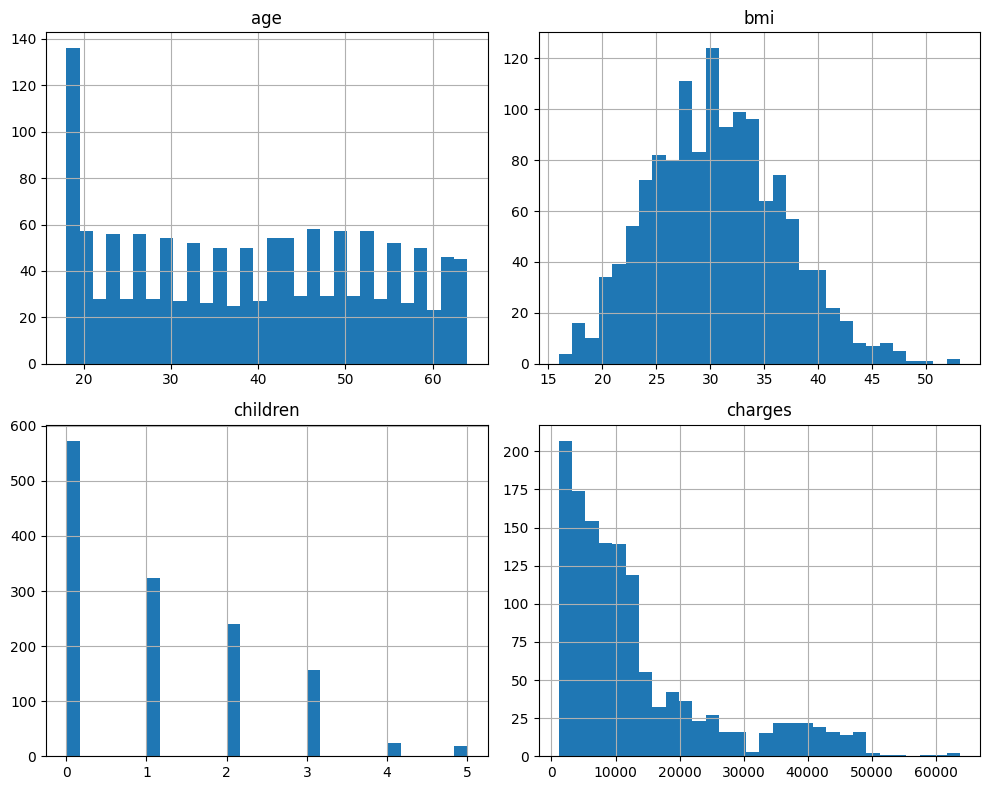

In [ ]:
# Numerical distributions
df_clean[['age', 'bmi', 'children', 'charges']].hist(bins=30, figsize=(10,8))
plt.tight_layout()
plt.show()

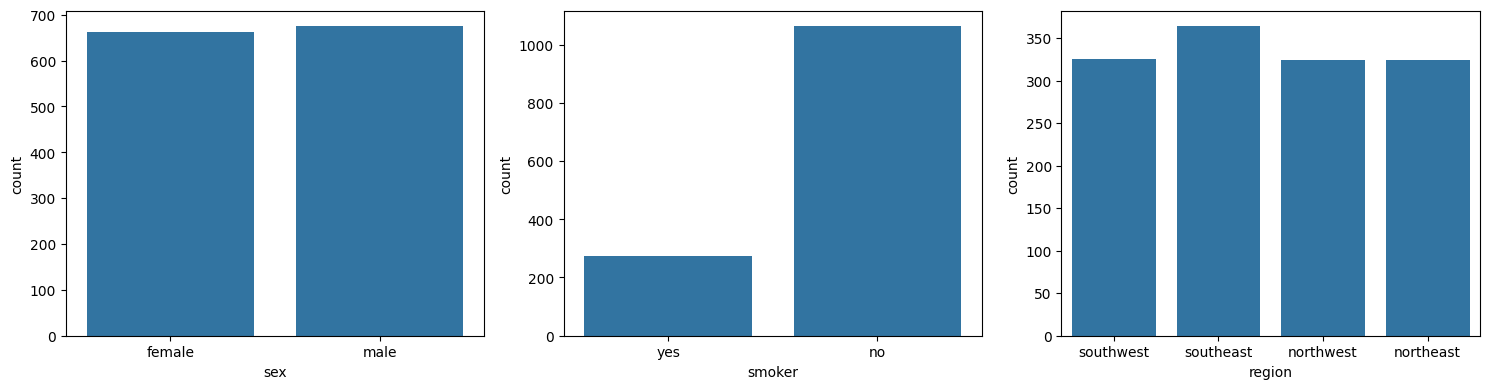

In [ ]:
# Categorical counts
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.countplot(x='sex', data=df_clean, ax=axes[0])
sns.countplot(x='smoker', data=df_clean, ax=axes[1])
sns.countplot(x='region', data=df_clean, ax=axes[2])
plt.tight_layout()
plt.show()

## Bivariate Analysis

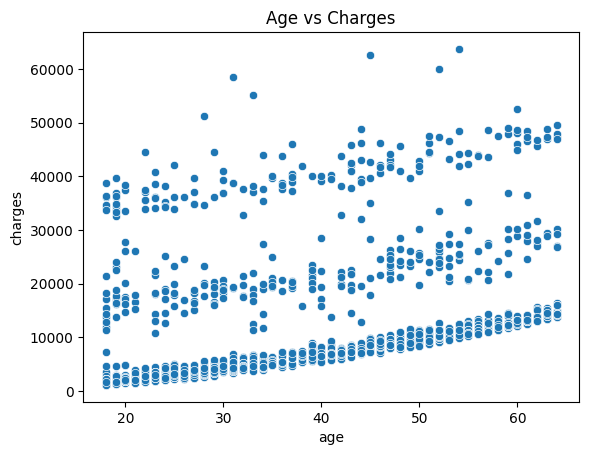

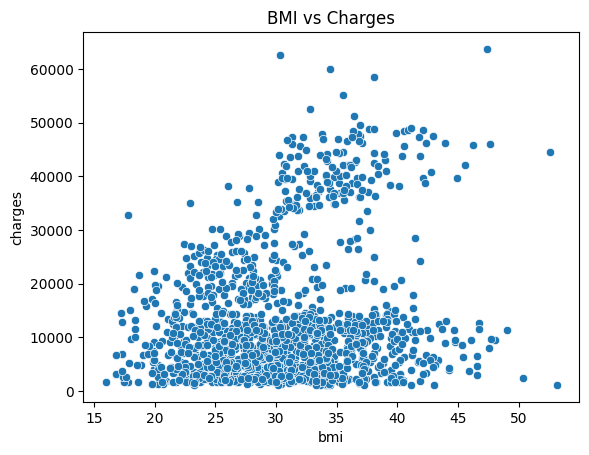

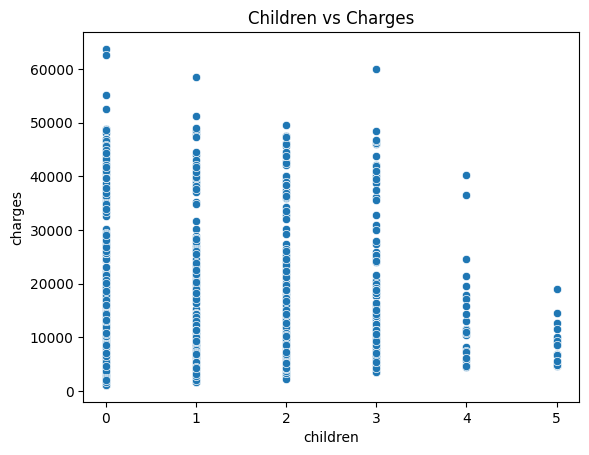

In [ ]:
# Scatter plots
sns.scatterplot(x='age', y='charges', data=df_clean)
plt.title('Age vs Charges')
plt.show()

sns.scatterplot(x='bmi', y='charges', data=df_clean)
plt.title('BMI vs Charges')
plt.show()

sns.scatterplot(x='children', y='charges', data=df_clean)
plt.title('Children vs Charges')
plt.show()

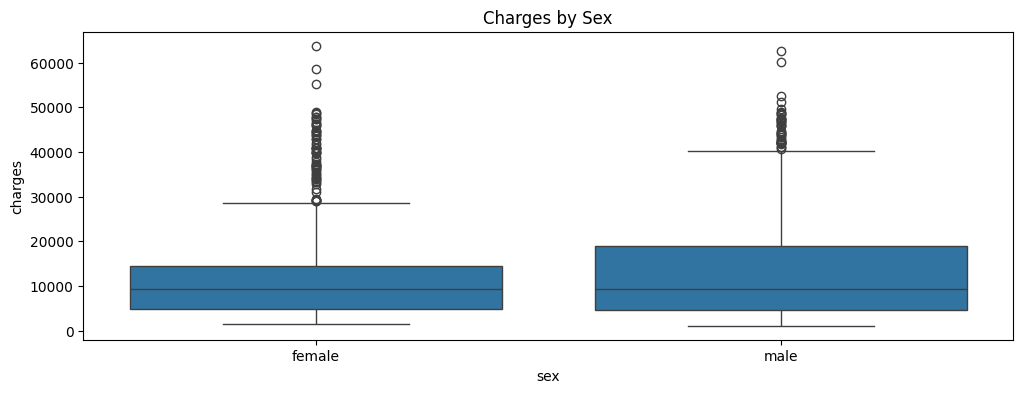

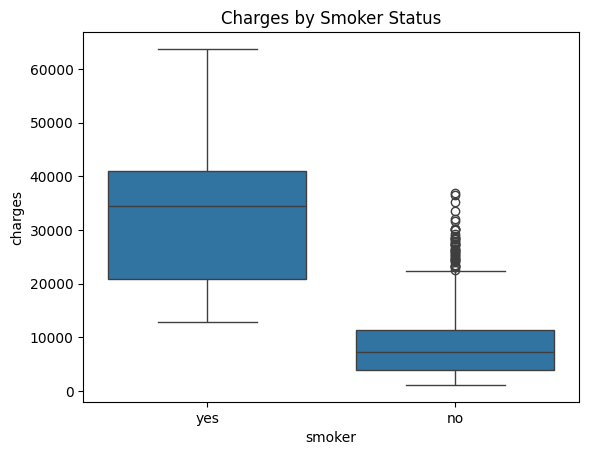

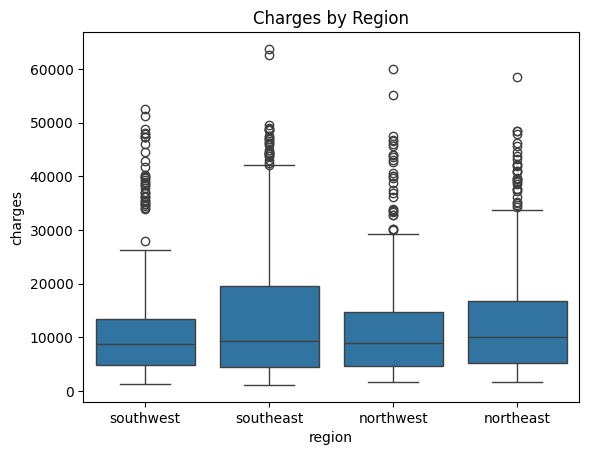

In [ ]:
# Boxplots
plt.figure(figsize=(12,4))
sns.boxplot(x='sex', y='charges', data=df_clean)
plt.title('Charges by Sex')
plt.show()

sns.boxplot(x='smoker', y='charges', data=df_clean)
plt.title('Charges by Smoker Status')
plt.show()

sns.boxplot(x='region', y='charges', data=df_clean)
plt.title('Charges by Region')
plt.show()

### Multivariate Analysis

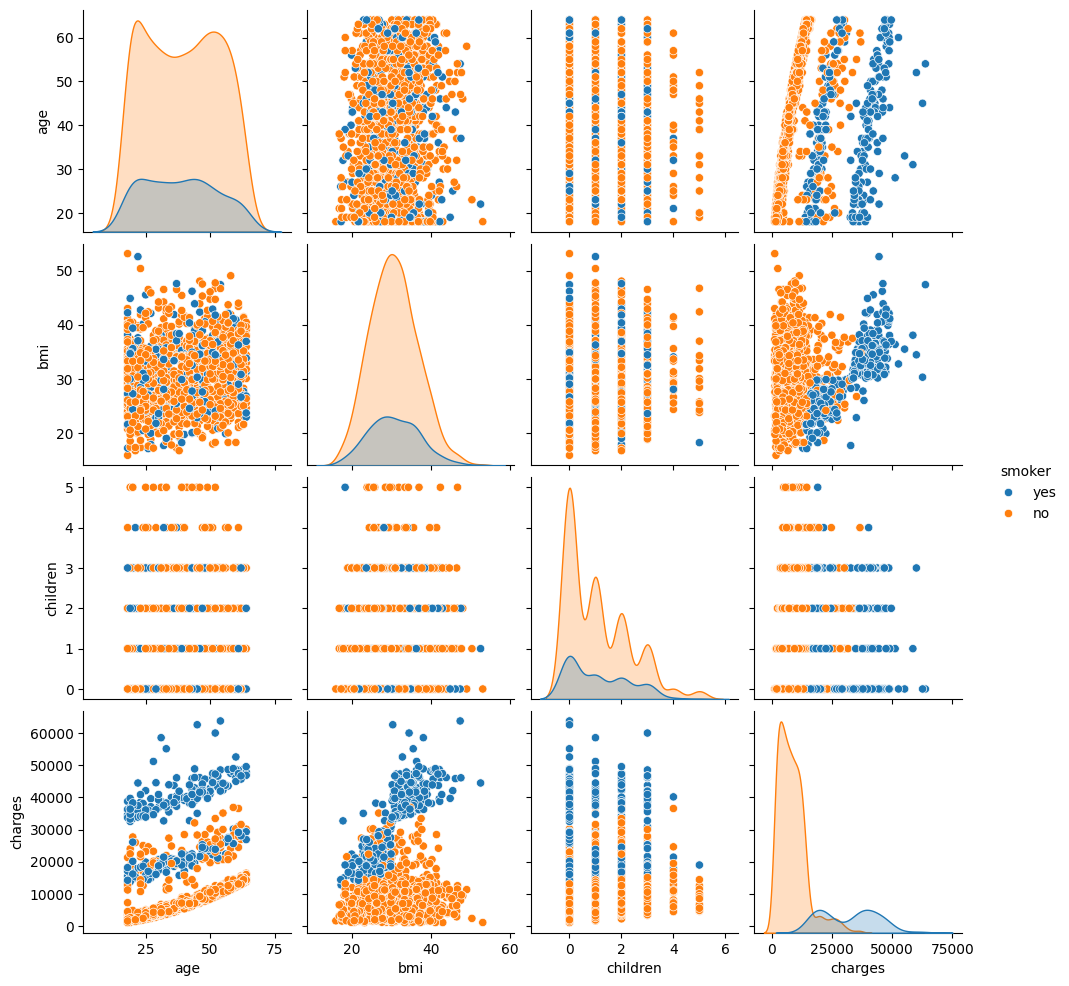

In [ ]:
# Pairplot
sns.pairplot(df_clean, hue='smoker')
plt.show()

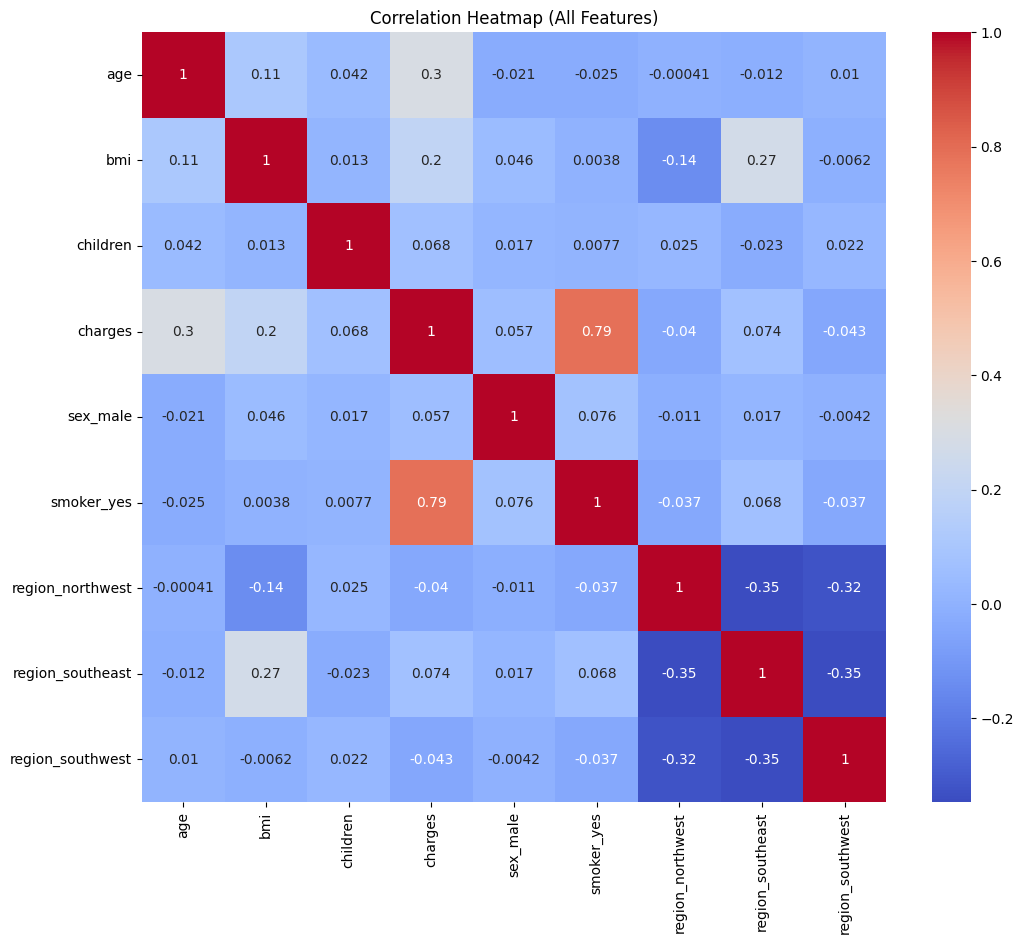

In [45]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_clean, drop_first=True)

plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (All Features)')
plt.show()

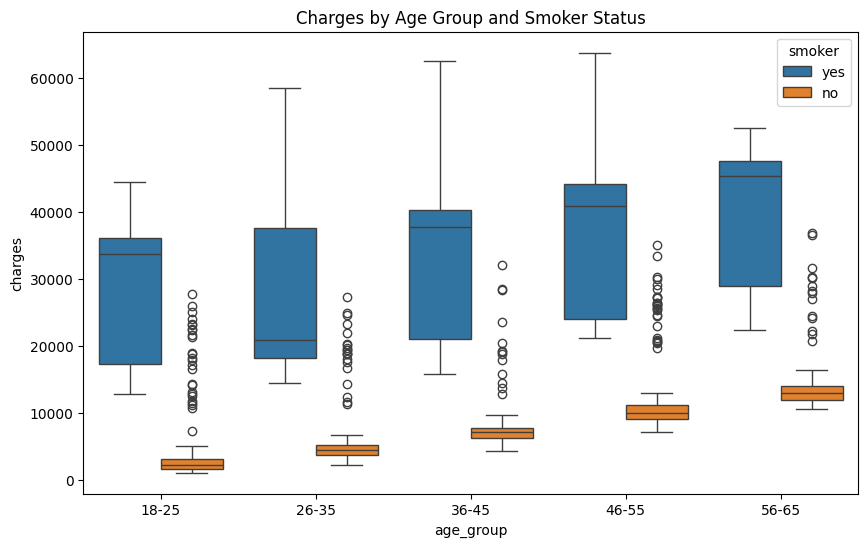

In [46]:
# Grouped boxplot: charges by smoker & age group
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25','26-35','36-45','46-55','56-65'])
plt.figure(figsize=(10,6))
sns.boxplot(x='age_group', y='charges', hue='smoker', data=df_clean)
plt.title('Charges by Age Group and Smoker Status')
plt.show()

### Specific Analyses

C:\Users\ThapeloMasebe\AppData\Local\Temp\ipykernel_38264\2211761955.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age', y='charges', hue='smoker', data=df_clean, ci=None)


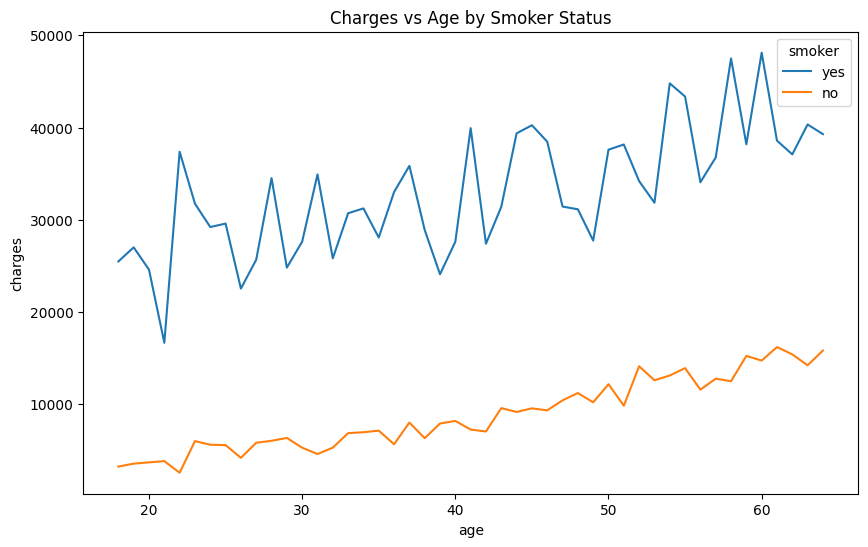

In [47]:
# Charges for smokers/non-smokers as they age
plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='charges', hue='smoker', data=df_clean, ci=None)
plt.title('Charges vs Age by Smoker Status')
plt.show()

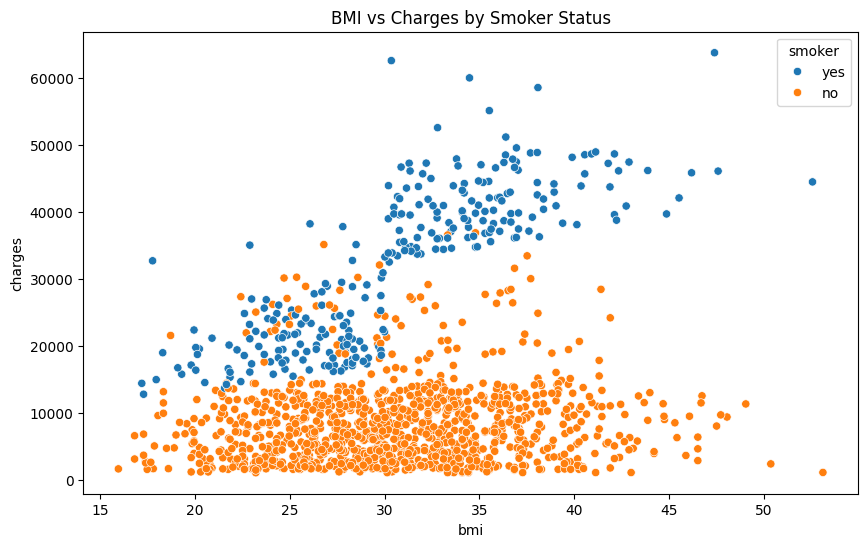

In [48]:
# BMI effect on charges for smokers
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df_clean)
plt.title('BMI vs Charges by Smoker Status')
plt.show()

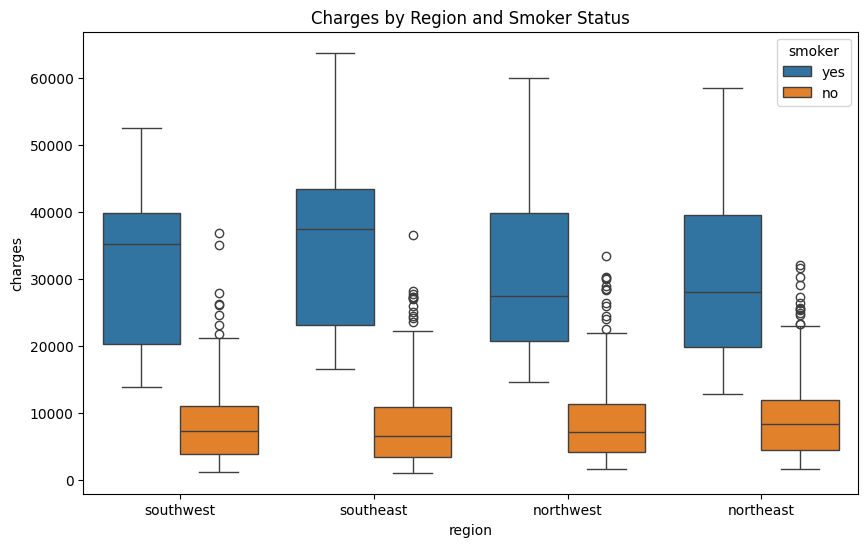

In [49]:
# Region-wise analysis
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='charges', hue='smoker', data=df_clean)
plt.title('Charges by Region and Smoker Status')
plt.show()

## Observations and Insights

### Demographics and Data Distribution
- The dataset is well-balanced by sex (male/female) and region.

- Most policyholders are non-smokers; smokers are a minority.

- Age distribution is fairly uniform among adults, with a slight peak at the youngest age group (18-20).

- BMI follows a near-normal distribution, centered around 30.

- Most people have 0-2 children; very few have 4 or 5.


### Charges Distribution
- Insurance charges are right-skewed: most policyholders pay less than $15,000, but there are significant outliers above $40,000.

- The majority of low charges correspond to non-smokers and/or younger individuals.

### Impact of Smoking
**Smoker status is the strongest predictor of high charges:**

- nSmokers pay dramatically higher premiums than non-smokers (boxplot: Charges by Smoker Status).

- This is confirmed by the correlation heatmap (smoker_yes has a strong positive correlation with charges, ~0.79).

- The effect is consistent across all regions and age groups.


### Age and Charges
- There is a clear upward trend in charges as age increases, especially for smokers (line plot: Charges vs Age by Smoker Status).

- For non-smokers, charges increase gradually with age.

- For smokers, charges are much higher at every age, and the gap widens with age.

### BMI and Charges
- Higher BMI is associated with higher charges, but this relationship is much stronger for smokers (scatter: BMI vs Charges by Smoker Status).

- Among non-smokers, BMI has a weaker influence on charges.

### Region
- Charges are similar across regions, but the Southeast shows slightly higher median charges (boxplot: Charges by Region).

- However, when controlling for smoker status, regional differences become less pronounced.


### Sex
- There is **no significant difference in charges between males and females** (boxplot: Charges by Sex).

- Correlation heatmap confirms that sex has little to no correlation with charges.

### Children
- Number of children does not show a strong relationship with charges (scatter: Children vs Charges).

- Having more children does not significantly increase insurance costs.


### Multivariate Relationships
- Pairplots and grouped boxplots reinforce that smoking status dominates other features in determining charges.

- Age and BMI further increase charges, especially for smokers.

## Summary Table

| Feature   | Impact on Charges      | Notes                                         |
|-----------|-----------------------|-----------------------------------------------|
| Smoker    | Very High             | Strongest single factor                       |
| Age       | Moderate to High      | Especially for smokers                        |
| BMI       | Moderate              | Stronger for smokers                          |
| Region    | Low                   | Slightly higher in Southeast                  |
| Sex       | Negligible            | No meaningful difference                      |
| Children  | Negligible            | No meaningful difference                      |


### Business Insights
**Targeting smoking cessation** could significantly reduce insurance costs.

- Premiums should be risk-adjusted primarily for smoking status, age, and BMI.

- Regional and gender-based pricing adjustments are not justified by the data.

- Young, healthy, non-smoking customers are low-risk and could be incentivized.